<a href="https://colab.research.google.com/github/prithvimurjani/Titanic-Kaggle-Competition/blob/main/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Understanding nature of the data .info() .describe()
# Histograms and boxplots
# Value counts # Since we can't do histograms for categorical variables
# Missing data
# Correlation between the metrics
# Exploring interesting themes
    # Wealthy survive?
    # By location
    # Age scatterplot
    # Young and wealthy variable?
    # Total spent?
# Feature engineering
# preprocess data together or use a transformer?
    # use label for train and test
# Scaling?

# Model Baseline
# Model comparison with CV

Exploring the data

For NUMERIC data - 
    Make histograms to understand dsitributions
    Corrplot
    Pivot Table comparing survival rate across numeric variables

For CATEGORICAL data - 
    Make bar charts to understand balance of classes
    Make pivot tables to understand relationship with survival

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data['train_test'] = 1
test_data['train_test'] = 0
test_data['Survived'] = np.NaN
all_data = pd.concat([train_data,test_data])
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
# Use describe() to get a better understanding of the central tendencies of the data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [6]:
train_data.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [7]:
# Looking at numeric and categorical variables separately
df_numerical = train_data[['Age', 'SibSp', 'Parch', 'Fare']]
df_categorical = train_data[['Survived','Pclass','Sex', 'Ticket', 'Cabin', 'Embarked']]

In [8]:
df_numerical.head(1)

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.25


In [9]:
df_categorical.head(1)

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
0,0,3,male,A/5 21171,NaN,S


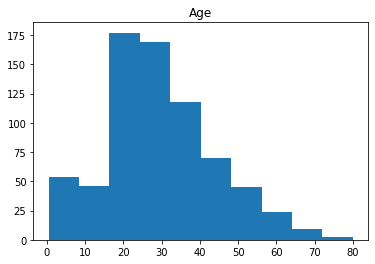

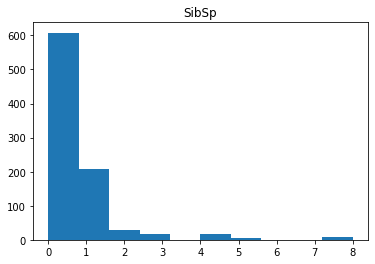

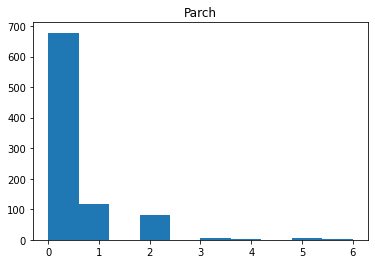

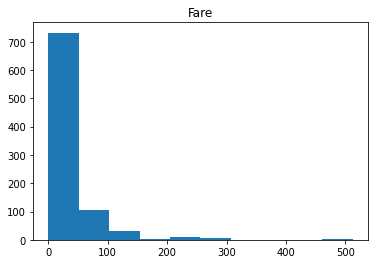

In [10]:
# Making histograms for all numeric variables
for i in df_numerical.columns:
    plt.hist(df_numerical[i])
    plt.title(i)
    plt.show()

Age is fairly normalized, but fare can be normalized since we see larger values for it initially.
SibSp and Parch have fewer categories so it may not really matter

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


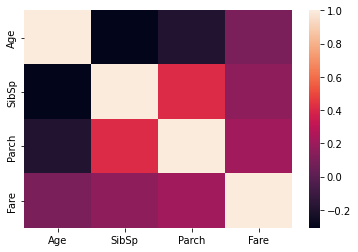

In [11]:
# Lets understand the correlation between variables
print(df_numerical.corr())
sns.heatmap(df_numerical.corr())

In [12]:
# Understanding how these numerical features compare with the survival rate
pd.pivot_table(train_data, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


The above data indicates that younger people have a better chance of surviving, richer people had better survival rates, parch indicates perhaps parents may put their children first, and Sibsp indicates maybe a sibling has a better chance at survival.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


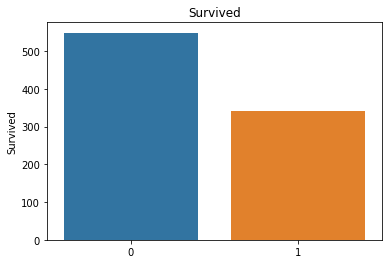

<Figure size 2880x1296 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


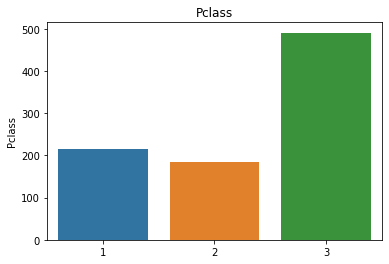

<Figure size 2880x1296 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


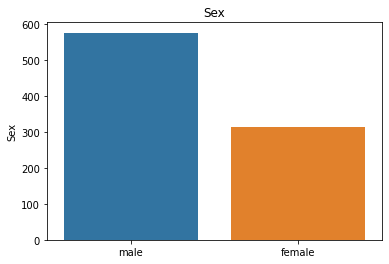

<Figure size 2880x1296 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


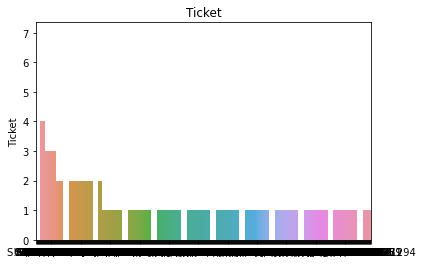

<Figure size 2880x1296 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


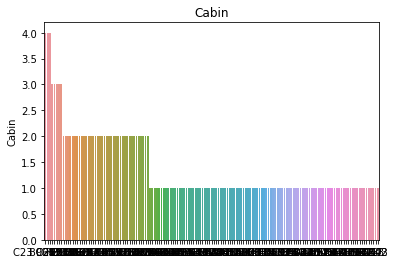

<Figure size 2880x1296 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


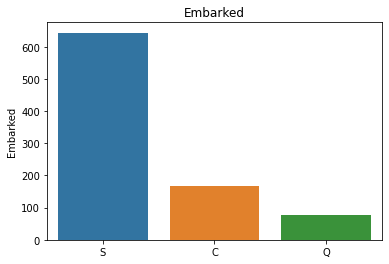

<Figure size 2880x1296 with 0 Axes>

In [13]:
# Exploring the categorical variables
for i in df_categorical.columns:
    sns.barplot(df_categorical[i].value_counts().index, df_categorical[i].value_counts()).set_title(i)
    plt.figure(figsize=(40,18))
    plt.show()

The Cabin and Ticket graphs are messy and some feature engineering can be done there

In [14]:
# Building a pivot table to compare the categorical variables with the survival rate
print(pd.pivot_table(train_data, index = 'Survived', columns ='Pclass', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


We notice a lot more people in 1st class survived.
More females survived compared to men
For place of embark, maybe people embarking at C showed a better survival rate but this is trivial.

Feature engineering

1. Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)

2. Tickets - Do different ticket types impact survival rates?

3. Does a person's title relate to survival rates?



In [15]:
train_data.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [16]:
# We are trying to understand how many people have multiple cabins
train_data['cabin_multiple'] = train_data.Cabin.apply(lambda x : 0 if pd.isna(x) else len(x.split(' ')))
# after looking at this we may want to look at cabin by letter or by number. Let's create some categories for this
# letters
# multiple letters
train_data['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

We were trying to see if people had multiple cabins, but the majority did not.

In [17]:
train_data['cabin_multiple'].unique()

array([0, 1, 3, 2, 4])

In [18]:
pd.pivot_table(train_data, index ='Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc = 'count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [19]:
# Create a category based on the cabin letter. Since cabins with the same letter may be in and around the same area we shall analyze their 
# effect on survival rates.
# n stands for no cabin letter given
train_data['cabin_adv'] = train_data.Cabin.apply(lambda x : str(x)[0])
train_data['cabin_adv']

0      n
1      C
2      n
3      C
4      n
      ..
886    n
887    B
888    n
889    C
890    n
Name: cabin_adv, Length: 891, dtype: object

In [20]:
train_data['cabin_adv'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64

In [21]:
pd.pivot_table(train_data, index = 'Survived', columns ='cabin_adv', values = 'Name', aggfunc = 'count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


We notice cabins B, C, D and E had better survival rate

In [22]:
# Understand ticket values better since there were around 700 unique values for them
# numeric vs non numeric
train_data['numeric_ticket'] = train_data.Ticket.apply(lambda x : 1 if x.isnumeric() else 0)
train_data['ticket_letters'] = train_data.Ticket.apply(lambda x : ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)

In [23]:
train_data['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [24]:
# Viewing all the rows in the dataframe through scrolling for our convenience
pd.set_option('max_rows', None)
train_data['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
wep            3
pp             3
sopp           3
ppp            2
scah           2
sotono2        2
swpp           2
as             1
sc             1
scow           1
scahbasle      1
casoton        1
fc             1
sop            1
sp             1
fa             1
sca4           1
Name: ticket_letters, dtype: int64

The ticket naming conventions don't seem to provide too much information

In [25]:
# difference in numeric vs non-numeric tickets in survival rate
pd.pivot_table(train_data, index ='Survived', columns = 'numeric_ticket', values = 'Ticket', aggfunc = 'count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


The survival rate ratios for numeric tickets seem pretty similar, so we can ignore the fact that it could have had any impact

In [26]:
# difference in ticket types
pd.pivot_table(train_data, index ='Survived', columns = 'ticket_letters', values = 'Ticket', aggfunc = 'count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,pc,pp,ppp,sc,sca4,scah,scahbasle,scow,scparis,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,21.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,6.0,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,39.0,2.0,1.0,1.0,NaN,1.0,1.0,NaN,5.0,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


Thought it doesn't provide much value, we could use it with algorithms like decision trees or random forests since they split based on most impactful variable. So even if it doesn't have much value it probably won't include it at all.

In [27]:
# Feature engineering on a person's title
train_data['name_title'] = train_data.Name.apply(lambda x : x.split(',')[1].split('.')[0].strip())
# mr, mrs, ms, master etc.

In [28]:
train_data['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Mme               1
the Countess      1
Sir               1
Jonkheer          1
Ms                1
Don               1
Capt              1
Lady              1
Name: name_title, dtype: int64

In [29]:
pd.set_option('max_column', None)
pd.pivot_table(train_data, index = 'Survived', columns = 'name_title', values = 'Ticket',aggfunc = 'count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


Data processing for the model

1. Drop values from embarked (only 2)

2. Inclued only relevant variables, since we have limited data, leave out things like name, id

3. Do categorical transforms on all data, usually we would use a transformer but with this approach we can ensure that the training and test data have the same columns. We also may be able to infer something about the shape of the test data through this method. Use of one hot encoder is generally not recommended.

4. Impute data with mean for fare and age (Should also experiment with median) 

5. Normalize fare using logarithm to give more semblance of a normal distribution

6. Scaled data 0-1 with standard scaler

In [30]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


(889,)

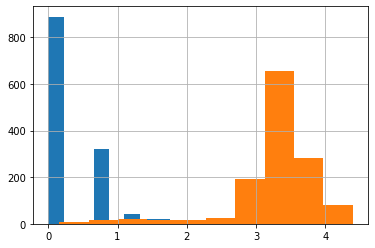

In [31]:
# Create all categorical values as done above for both train and test data
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x : 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x : str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x : 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x : ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x : x.split(',')[1].split('.')[0].strip())

# Impute nulls for continous data
all_data.Age = all_data.Age.fillna(train_data.Age.mean())
# For fare we use the median if it is not normally distributed, however we use mean anyway in this case even though it is not normally distributed
all_data.Fare = all_data.Age.fillna(train_data.Fare.mean())

# Drop null values on 'Embakred'. Only 2 instances of this in train and 0 in test
all_data.dropna(subset = ['Embarked'], inplace = True)

# Trial of log norm of sibsp (not used)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

# log norm of Fare (used)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# Converted fare to categiry for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

# Created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'norm_fare', 'Embarked', 'cabin_adv', 'cabin_multiple',
                                      'numeric_ticket', 'name_title', 'train_test']])

# Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis = 1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis = 1)

y_train = all_data[all_data.train_test == 1].Survived
y_train.shape

In [32]:
# Scale data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age', 'SibSp', 'Parch','norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age','SibSp', 'Parch', 'norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis = 1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis = 1)

y_train = all_data[all_data.train_test == 1].Survived                                                                    

Trying out different models with default parameters, using 5 fold cross validation to get a baseline.

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [34]:
# Baseline mean scores from 5 as crossvalidation
# Naive Bayes = 72.1
# Logistic Regression = 82.4%
# Decision Trees = 77.05%
# K Nearest Neighbors = 81.32%
# Random Forest = 80.02%
# Support Vector Machine = 83.13%
# Voting classifier (All models) = 81.2%

In [35]:
# Using Naive Bayes
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.6741573  0.69101124 0.75842697 0.75280899 0.72881356]
0.7210436107408112


In [36]:
# Logistic Regression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.79775281 0.81460674 0.8258427  0.81460674 0.85310734]
0.8211832666793626


In [37]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.80337079 0.81460674 0.8258427  0.82022472 0.85875706]
0.8245604011934236


In [38]:
# Decision Trees
dt = tree.DecisionTreeClassifier(random_state = 1)
cv= cross_val_score(dt, X_train, y_train, cv =5)
print(cv)
print(cv.mean())

[0.7752809  0.7752809  0.80337079 0.73595506 0.76271186]
0.7705199009712436


In [39]:
# Decision Trees
dt = tree.DecisionTreeClassifier(random_state = 1)
cv= cross_val_score(dt, X_train_scaled, y_train, cv =5)
print(cv)
print(cv.mean())

[0.7752809  0.7752809  0.80898876 0.73595506 0.75706215]
0.7705135529740367


In [40]:
# K Nearest Neighbor
knn = KNeighborsClassifier()
cv= cross_val_score(knn, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.78651685 0.81460674 0.83146067 0.80898876 0.82485876]
0.8132863581540025


In [41]:
# K Nearest Neighbor
knn = KNeighborsClassifier()
cv= cross_val_score(knn, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.79775281 0.81460674 0.76966292 0.80337079 0.82485876]
0.8020504030978225


In [42]:
# Random Forest
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.78651685 0.80898876 0.83146067 0.76966292 0.81355932]
0.8020377071034087


In [43]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.78089888 0.80898876 0.83146067 0.7752809  0.81355932]
0.8020377071034088


In [44]:
# Support Vector Machine
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.84831461 0.82022472 0.8258427  0.80337079 0.85875706]
0.8313019742271314


In [45]:
# XGBoost
#import xgboost as xgb
#xgb_regressor = xgb.XGBRegressor()
#xgb = XGBClassifier(random_state = 1)
#cv = cross_val_score(xgb, X_train_scaled, y_train, cv = 5)
#print(cv)
#print(cv.mean())

In [46]:
# Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each cassifier gets 1 vote "yes" or "no" and the
# result is just a popular vote. For this you generally want odd numbers
# A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1, it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr', lr), ('knn',knn), ('rf',rf), ('gnb',gnb),('svc',svc)], voting = 'soft')

In [47]:
cv = cross_val_score(voting_clf, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.78089888 0.80337079 0.83707865 0.80898876 0.83050847]
0.8121691106455913


In [48]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled)
basic_submission = {'PassengerId': test_data.PassengerId, 'Survived' : y_hat_base_vc.astype(int)}
base_submission = pd.DataFrame(data = basic_submission)
base_submission.to_csv('base_submission.csv', index = False)

Model tuning
After getting the baselines, let's see if we can improve on the individual model results. Mainly use grid search to tune the models. We use Randomized Search for the Random Forest and XG boosted model to simplify testing time.

* Default model vs Tuned model performance
Naive Bayes 
Logistic Regression 82.4% vs 82.6%


In [49]:
# DEFAULT MODEL VS TUNED MODEL
# Naive Bayes = 72.1 VS None
# Logistic Regression = 82.4% VS 82.6%
# Decision Trees = 77.05% VS
# K Nearest Neighbors = 81.32% VS 83.35%
# Random Forest = 80.02% VS 83.2%
# Support Vector Machine = 83.13% VS 83.13%
# Voting classifier (All models) = 81.2% 

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [51]:
# A simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best score: ' + str(classifier.best_score_))
    print('Best parameters: ' + str(classifier.best_params_))

In [52]:
# Logistic Regression
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1','l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']
             }
clf_lr = GridSearchCV(lr, param_grid = param_grid, cv =5 , verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled, y_train)
clf_performance(best_clf_lr, 'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    4.3s


Logistic Regression
Best score: 0.8268012442074525
Best parameters: {'C': 0.615848211066026, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.0s finished


In [53]:
# K Nearest Neighbor
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3,5,7,9],
             'weights' : ['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree'],
             'p': [1,2]
             } 
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled, y_train)
clf_performance(best_clf_knn , 'KNN')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best score: 0.833561861232781
Best parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    3.2s finished


In [54]:
# Support Vector Machine
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel' : ['rbf'], 'gamma' : [0.1, 0.5, 1, 2, 5, 10],
                                 'C': [0.1, 1, 10, 100, 1000]
                                 },
                                 {'kernel' : ['linear'], 'C' : [0.1, 1, 10, 100, 1000]},
                                 {'kernel' : ['poly'], 'degree' : [2, 3, 4, 5], 'C' : [0.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled, y_train)
clf_performance(best_clf_svc, 'SVC')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.7min


SVC
Best score: 0.8313083222243381
Best parameters: {'C': 0.1, 'degree': 3, 'kernel': 'poly'}


[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:  7.3min finished


In [55]:
# Random Forest
# Random Forests have limitless possibilities, so we specify the parameters and then use the RandomizedSearchCV to 
# randomly sample from them and then choose the best ones possible

rf = RandomForestClassifier(random_state = 1)
param_grid = {'n_estimators': [100, 500, 1000],
             'bootstrap' : [True, False],
              'max_depth' : [3, 5, 10, 20, 50, 75, 100, None],
              'max_features' : ['auto', 'sqrt'],
              'min_samples_leaf' : [1, 2, 4, 10],
              'min_samples_split' : [2, 5, 10]
             }
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled, y_train)
clf_performance(best_clf_rf_rnd, 'Random Forest')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.2min finished


Random Forest
Best score: 0.8324255697327493
Best parameters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


In [56]:
rf = RandomForestClassifier(random_state = 1)
param_grid = {'n_estimators': [400, 450, 500, 550],
              'criterion' : ['gini', 'entropy'],
             'bootstrap' : [True],
              'max_depth' : [15, 20, 25],
              'max_features' : ['auto', 'sqrt', 10],
              'min_samples_leaf' : [2, 3],
              'min_samples_split' : [2, 3]
             }

clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled, y_train)
clf_performance(best_clf_rf, 'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 17.2min finished


Random Forest
Best score: 0.831321018218752
Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


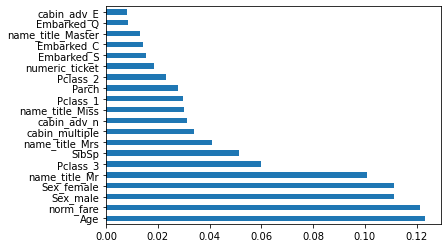

In [57]:
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled, y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index = X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [58]:
y_hat_rf = best_clf_rf.best_estimator_.predict(X_test_scaled)
rf_submission = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_rf}
submission_rf = pd.DataFrame(data = rf_submission)
submission_rf.to_csv('submission_.csv', index = False)

Random Forest seems to have the best performance.

We can do more detailed analysis using soft voting and hard voting classifiers


In [59]:
# We shall experiment with a hard voting classifier of three estimators (KNN, SVM, RF) 81.6 %
# We shall experiment with a soft voting classifier of three estimators (KNN, SVM, RF) (Used this) 80.9%
# We shall experiment with soft voting classifier on all esimators better than 80% (KNN, RF, LR, SVC) 81.7%

In [60]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('knn', best_knn), ('rf', best_rf), ('svc', best_svc)], voting = 'hard')

voting_clf_soft = VotingClassifier(estimators = [('knn', best_knn), ('rf', best_rf), ('svc', best_svc)], voting = 'soft')


voting_clf_all = VotingClassifier(estimators = [('knn', best_knn), ('rf', best_rf), ('svc', best_svc), ('lr', best_lr)], voting = 'soft')

print('voting_clf_hard: ', cross_val_score(voting_clf_hard, X_train, y_train, cv = 5))
print('voting_clf_hard mean: ', cross_val_score(voting_clf_hard, X_train, y_train, cv = 5).mean())


print('voting_clf_soft: ', cross_val_score(voting_clf_soft, X_train, y_train, cv = 5))
print('voting_clf_soft mean: ', cross_val_score(voting_clf_soft, X_train, y_train, cv = 5).mean())

print('voting_clf_all: ', cross_val_score(voting_clf_all, X_train, y_train, cv = 5))
print('voting_clf_all mean: ', cross_val_score(voting_clf_all, X_train, y_train, cv = 5).mean())



voting_clf_hard:  [0.80898876 0.80898876 0.83146067 0.78651685 0.84745763]
voting_clf_hard mean:  0.8166825366596839
voting_clf_soft:  [0.81460674 0.80337079 0.82022472 0.76966292 0.84180791]
voting_clf_soft mean:  0.8110582111343871
voting_clf_all:  [0.8258427  0.80337079 0.8258427  0.78089888 0.85310734]
voting_clf_all mean:  0.8189360756681268


In [61]:
# Assigning weights to some models in the soft voting classifier and using GridSearch to explore the impact of different weightings
# No new results were obtained
params = {'weights' : [[1,1,1], [1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv= 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_train_scaled, y_train)
clf_performance(best_clf_weight, 'VC Weights')
voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test_scaled)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   24.5s finished


VC Weights
Best score: 0.8324446137243701
Best parameters: {'weights': [1, 1, 2]}


In [62]:
# Make predictions
voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_all.fit(X_train_scaled, y_train)
best_rf.fit(X_train_scaled, y_train)

y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled)
y_hat_rf = best_rf.predict(X_test_scaled)
y_hat_vc_soft = voting_clf_soft.predict(X_test_scaled)
y_hat_vc_all = voting_clf_all.predict(X_test_scaled)

In [84]:
# Convert the output to DataFrames
final_data = {'PassengerId' : test_data.PassengerId, 'Survived' : y_hat_rf.astype(int)}
submission = pd.DataFrame(data = final_data)

final_data_2 = {'PassengerId' : test_data.PassengerId, 'Survived' : y_hat_vc_hard.astype(int)}
submission_2 = pd.DataFrame(data = final_data_2)

final_data_3 = {'PassengerId' : test_data.PassengerId, 'Survived' : y_hat_vc_soft.astype(int)}
submission_3 = pd.DataFrame(data = final_data_3)

final_data_4 = {'PassengerId' : test_data.PassengerId, 'Survived' : y_hat_vc_all.astype(int)}
submission_4 = pd.DataFrame(data = final_data_4)

In [85]:
final_data_comp = {'PassengerId': test_data.PassengerId, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_rf': y_hat_rf, 'Survived_vc_soft': y_hat_vc_soft,
                  'Survived_vc_all' : y_hat_vc_all}
comparison = pd.DataFrame(data= final_data_comp)

In [86]:
# Tracking the differences in output
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis = 1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis = 1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis = 1)


In [87]:
comparison.difference_hard_all.value_counts()

0    406
1     12
Name: difference_hard_all, dtype: int64

In [88]:
comparison.difference_soft_hard.value_counts()

0    408
1     10
Name: difference_soft_hard, dtype: int64

In [89]:
comparison.difference_rf_vc_hard.value_counts()

0    407
1     11
Name: difference_rf_vc_hard, dtype: int64

We checked if there is a difference in the output. Since we see some difference it is worth a try to make different submissions.**

In [90]:
# Prepare submission files
submission.to_csv('submission_rf.csv', index = False)
submission_2.to_csv('submission_vc_hard.csv', index = False)
submission_3.to_csv('submission_vc_soft.csv', index = False)
submission_4.to_csv('submission_vc_all.csv', index = False)


In [91]:
#submission.Survived = submission.Survived.astype(int)
submission_2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [92]:
submission.columns = ['PassengerId', 'Survived']
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
